In [5]:
import pandas as pd
import numpy as np 
import plotly.express as px
import plotly
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

# custom defined class/function
from src.data import make_data_dictionary

pd.set_option('display.max_columns', 500)

# Create a data dict for future reference

In [3]:
# read csv data file
home = str(Path.home())
data = pd.read_csv(home + '/Startup-Analysis/data/raw/startup_data.csv')

# only include necessary columns 
col = [c for c in data.columns if c not in ['Unnamed: 0', 'Unnamed: 6', 'state_code.1', 'object_id']]
data = data[col]

In [3]:
data.head()

,state_code,latitude,longitude,zip_code,id,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,92101,c:6669,San Diego,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,acquired
1,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,acquired
2,CA,32.901049,-117.192656,92121,c:65620,San Diego,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,acquired
3,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,acquired
4,CA,37.779281,-122.419236,94105,c:65806,San Francisco,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,closed


In [6]:
dd = make_data_dictionary.create_data_dictionary()
df_dd = dd.make_my_data_dictionary(data)
df_dd = dd.define_data_meaning(df_dd)

Provide a data definition for state_code state of the company
Provide a data definition for latitude latitude of the company
Provide a data definition for longitude longitude of the company
Provide a data definition for zip_code zip code of the company
Provide a data definition for id company id
Provide a data definition for city city of the company
Provide a data definition for name company name
Provide a data definition for labels target variable
Provide a data definition for founded_at when the company was funded
Provide a data definition for closed_at when the company was closed
Provide a data definition for first_funding_at when the commpany receive the first funding
Provide a data definition for last_funding_at when the company receive the last funding
Provide a data definition for age_first_funding_year age of the company when receiving the first funding
Provide a data definition for age_last_funding_year age of the company when receiving the last funding
Provide a data definiti

In [9]:
df_dd.to_html(home + '/Startup-Analysis/data/interim/data_dict.html')

# EDA (Exploratory Data Analysis)

### There are four major categories of the type of feature avaliable in this data set 
- geo location of the company;
- funding status of the company;
- industry of the company;
- size of the company

The steps of EDA will follow this order
1. see the data type of each column  
2. see whether there are missing data and whether we need to impute them  
3. generate summary stats based on the type of data  
4. Study the correlation among the features and target value

Since we already generated the data dict, this can answer the first two questions

In [4]:
data.describe()

,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.00000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,2.541975e+07,1.841820,0.527627,0.114843,0.089924,0.045504,0.221018,0.165764,0.156013,0.08559,0.079090,0.067172,0.056338,0.027086,0.036836,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,1.896344e+08,1.322632,0.499507,0.319005,0.286228,0.208519,0.415158,0.372070,0.363064,0.27991,0.270025,0.250456,0.230698,0.162421,0.188462,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,2.725000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,2.472500e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


age_first_milestone_year & age_last_milestore_year have missing values, seems like the age feature are highly correlated so we can potentially leverage this correlation to impute the data

<AxesSubplot:>

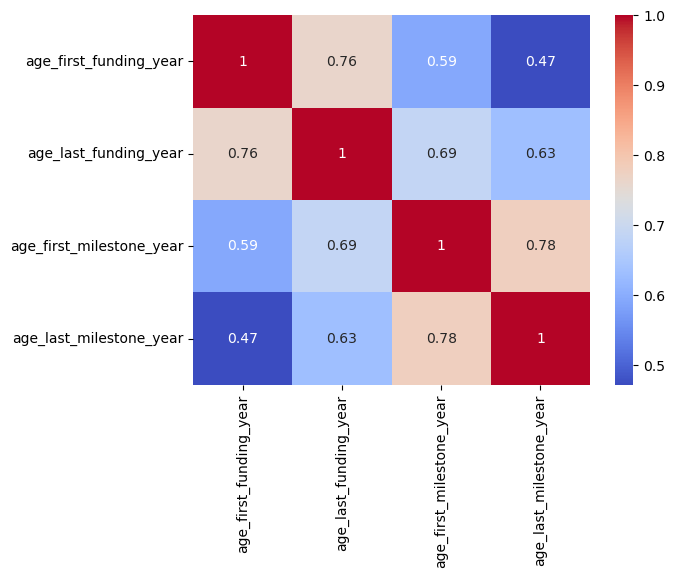

In [7]:
sns.heatmap(data[['age_first_funding_year', 
                  'age_last_funding_year', 
                  'age_first_milestone_year', 
                  'age_last_milestone_year']].corr(numeric_only = True), cmap = 'coolwarm', annot = True)

### correlation between state and the success status

In [4]:
data_state_grped = data.groupby(['status', 'state_code']).agg(count=('id', 'count')).reset_index()
total_status_cnt = data.groupby(['status']).agg(tot_count=('id', 'count')).reset_index()
company_cnt_by_state = data.groupby(['state_code']).agg(state_count=('id', 'count')).reset_index()

In [5]:
data_state_grped_merge = pd.merge(data_state_grped, total_status_cnt, on = 'status')
data_state_grped_merge = pd.merge(data_state_grped_merge, company_cnt_by_state, on = 'state_code')
data_state_grped_merge['state_wide_success_rate'] = data_state_grped_merge['count'] / data_state_grped_merge['state_count']
data_state_grped_merge['nation_wide_success_rate'] = data_state_grped_merge['count'] / data_state_grped_merge['tot_count']

#### nation wide success rate

In [9]:
import plotly.io as pio
pio.renderers.default = 'iframe'
fig = px.choropleth(data_state_grped_merge.query(''' status == 'acquired'  '''),
                    locations='state_code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='nation_wide_success_rate',
                    color_continuous_scale="dense", 
                    
                    )
fig.show()
pio.write_image(fig, "nation_wide.pdf")

#### state wide success rate

In [7]:
fig = px.choropleth(data_state_grped_merge.query(''' status == 'acquired'  '''),
                    locations='state_code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='state_wide_success_rate',
                    color_continuous_scale="dense", 
                    
                    )
fig.show()
pio.write_image(fig, "state_wide.pdf")

#### abs count of success start up companies

In [8]:

fig = px.choropleth(data_state_grped_merge.query(''' status == 'acquired'  '''),
                    locations='state_code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='count',
                    color_continuous_scale="dense", 
                    
                    )
fig.show()
pio.write_image(fig, "abs_cnt.pdf")

__CA,NY,MA is the top 3 state that has most start up companies and most successful start up companies__  
__OR,MA,CO is the top 3 state that has the largest success rate (keep in mind that OR & CO does not have too much startups)__  
__So the location of the company is an important factor__

### correlation between funding status and the success status

In [10]:
data.head()

,state_code,latitude,longitude,zip_code,id,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,92101,c:6669,San Diego,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,acquired
1,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,acquired
2,CA,32.901049,-117.192656,92121,c:65620,San Diego,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,acquired
3,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,acquired
4,CA,37.779281,-122.419236,94105,c:65806,San Francisco,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,closed


In [11]:
data['first_funding_ym'] = pd.to_datetime(data.first_funding_at).apply(lambda x: x.year *100 + x.month).astype(str)
data['first_funding_y'] = pd.to_datetime(data.first_funding_at).apply(lambda x: x.year).astype(str)
data['last_funding_ym'] = pd.to_datetime(data.last_funding_at).apply(lambda x: x.year *100 + x.month).astype(str)
data['last_funding_y'] = pd.to_datetime(data.last_funding_at).apply(lambda x: x.year).astype(str)
data['founded_at_ym'] = pd.to_datetime(data.founded_at).apply(lambda x: x.year *100 + x.month).astype(str)
data['founded_at_y'] = pd.to_datetime(data.founded_at).apply(lambda x: x.year).astype(str)

#### see whether the funding date has correlation 

In [91]:
plt.style.use('ggplot')

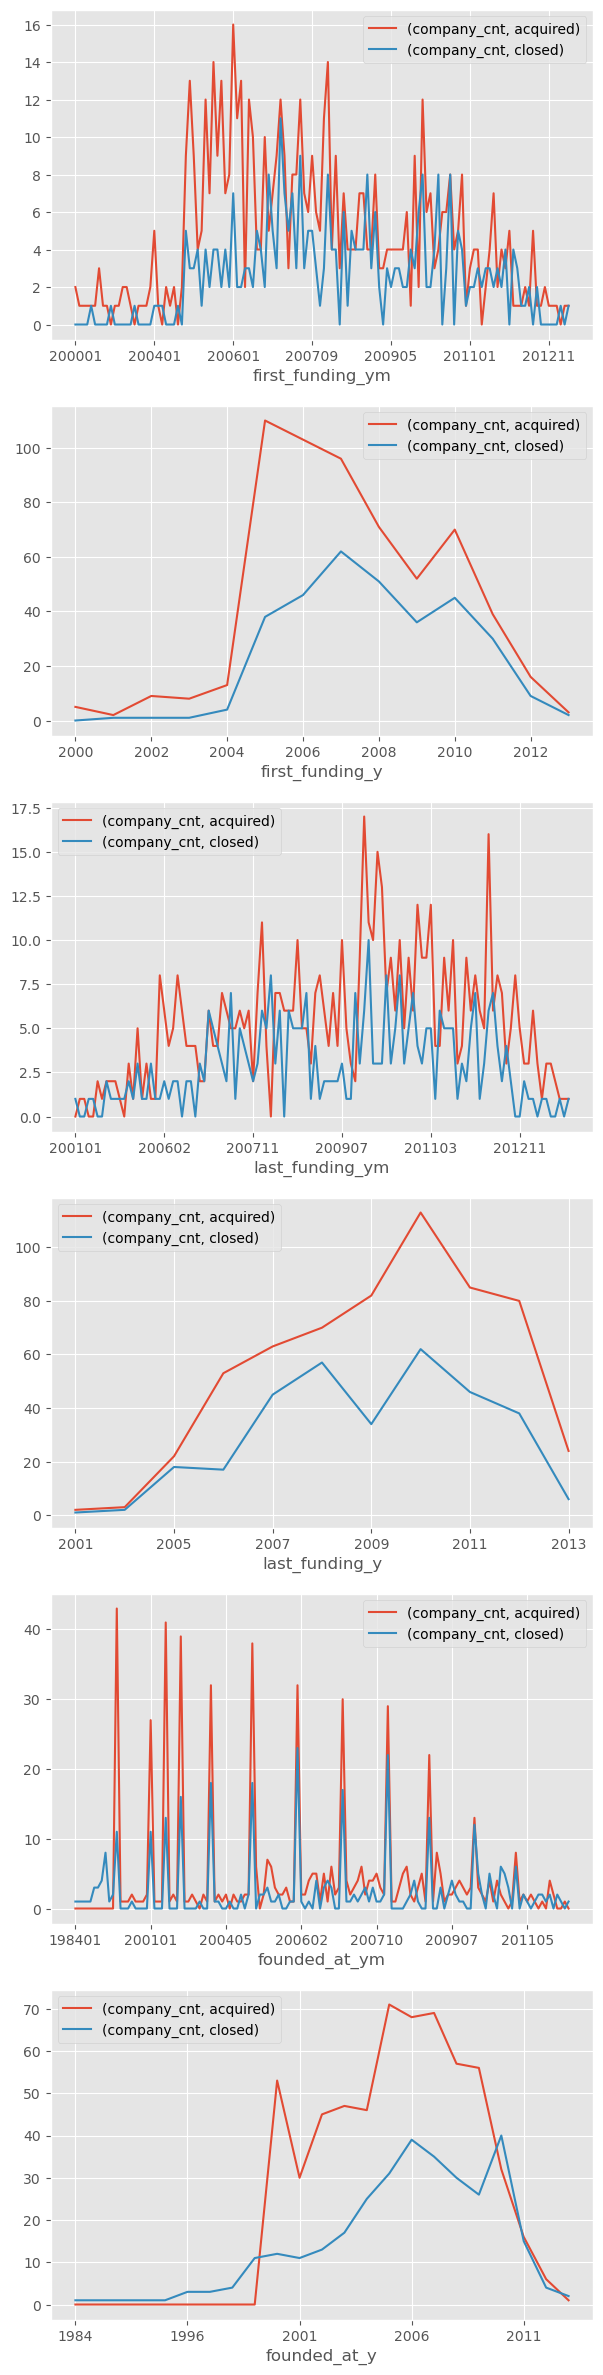

In [115]:
status_of_int = ['acquired', 'closed']
col_of_int = [
    'first_funding_ym', 
    'first_funding_y',
    'last_funding_ym',
    'last_funding_y',
    'founded_at_ym',
    'founded_at_y'
             ]

nrow = 6
ncol = 1
fig, axes = plt.subplots(nrows = nrow, ncols = ncol, figsize=(7, 30))
for i in range(len(col_of_int)):
    x_axes = i

        
    df = data.groupby(['status', col_of_int[i]]).agg(company_cnt=('id', 'count')).reset_index().pivot(index = col_of_int[i], 
                                                                                            columns = 'status'
                                                                                            ).fillna(0)
    df.columns = df.columns.to_flat_index()
    df.reset_index().plot.line(x = col_of_int[i], 
                               ax = axes[x_axes])
    

The year/year month of for when the company receiving funding does not seem to 
have very different distribution between success and not success company

#### the age of the company when receiving funding & other funding status

In [93]:
col_of_int = ['age_first_funding_year', 
              'age_last_funding_year', 
              'age_first_milestone_year',
              'age_last_milestone_year',
              'relationships',
              'funding_rounds',
              'funding_total_usd',
              'milestones']

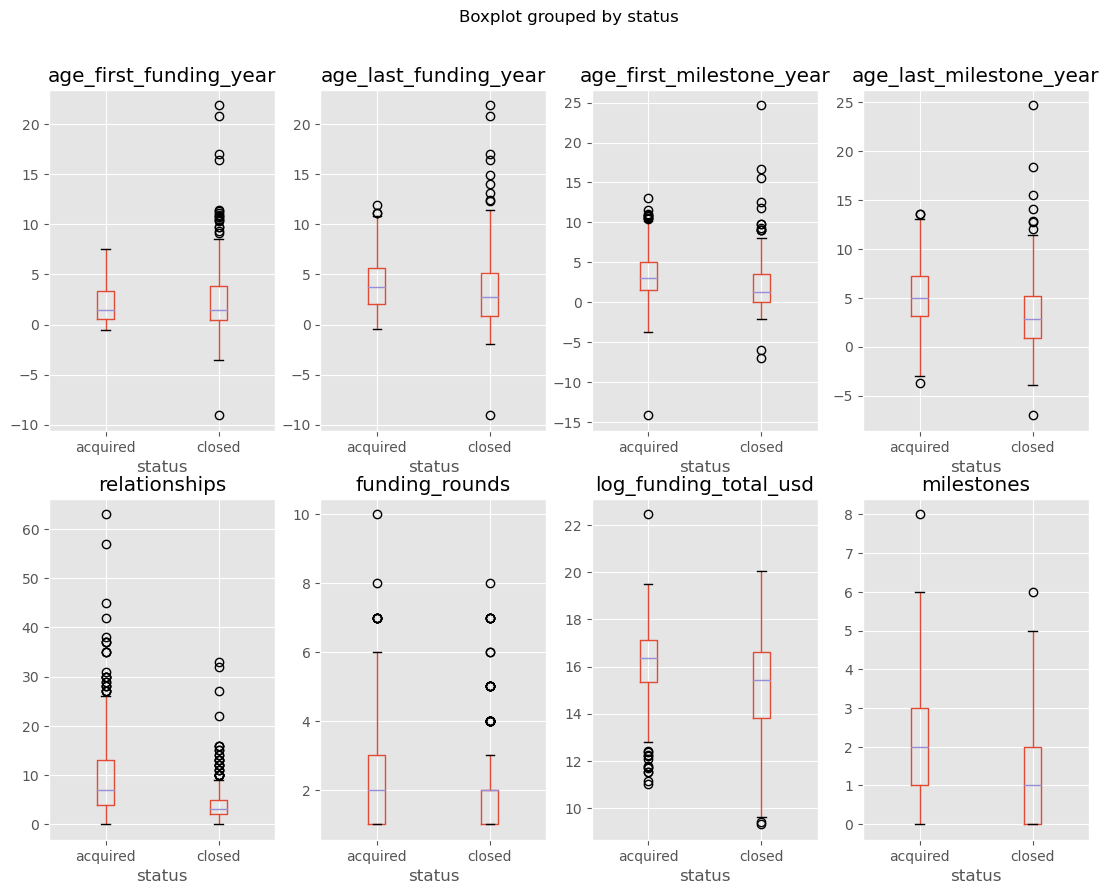

In [101]:
nrow = 2
ncol = 4
fig, axes = plt.subplots(nrows = nrow, ncols = ncol, figsize=(13, 10))
for i in range(len(col_of_int)):
    x_axes = int(i / ncol)
    y_axes = i % ncol
    
    if col_of_int[i] == 'funding_total_usd':
        pd.DataFrame({'status': data['status'], 
                     'log_funding_total_usd': np.log(data['funding_total_usd'])}).boxplot(column = 'log_funding_total_usd', by = 'status', 
                                                                                         ax = axes[x_axes, y_axes])
    else:
        data[['status', col_of_int[i]]].boxplot(column = col_of_int[i], by = 'status', ax = axes[x_axes, y_axes])

All those features seem to differ between those two groups, noticed that some age value is negative, so it will need to be cleaned/removed

#### Look at the funding round

In [102]:
col_of_int = ['has_VC',
              'has_angel',
              'has_roundA',
              'has_roundB',
              'has_roundC',
              'has_roundD']

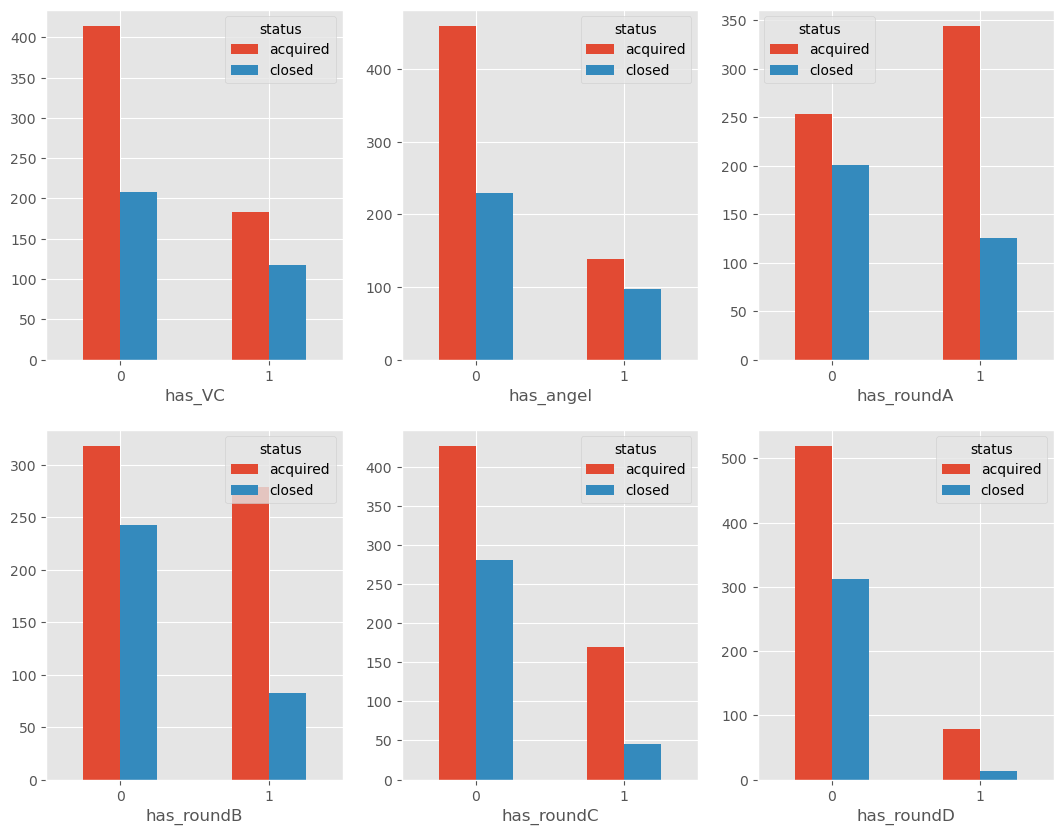

In [112]:
nrow = 2
ncol = 3
fig, axes = plt.subplots(nrows = nrow, ncols = ncol, figsize=(13, 10))
for i in range(len(col_of_int)):
    x_axes = int(i / ncol)
    y_axes = i % ncol
    
    df_tmp = data[['status', 'id', col_of_int[i]]].groupby(['status', col_of_int[i]])['id'].count().reset_index().pivot(
        index = col_of_int[i], 
        columns = 'status', 
        values = 'id')
    df_tmp.plot(kind = 'bar', ax = axes[x_axes, y_axes], rot = 0)
  





The funding round is very correlated with the success status

#### Look at the correlation for company's industry and success status

In [113]:
col_of_int = ['is_web',
              'is_mobile',
              'is_enterprise',
              'is_advertising',
              'is_gamesvideo',
              'is_ecommerce',
              'is_biotech',
              'is_consulting',
              'is_othercategory']

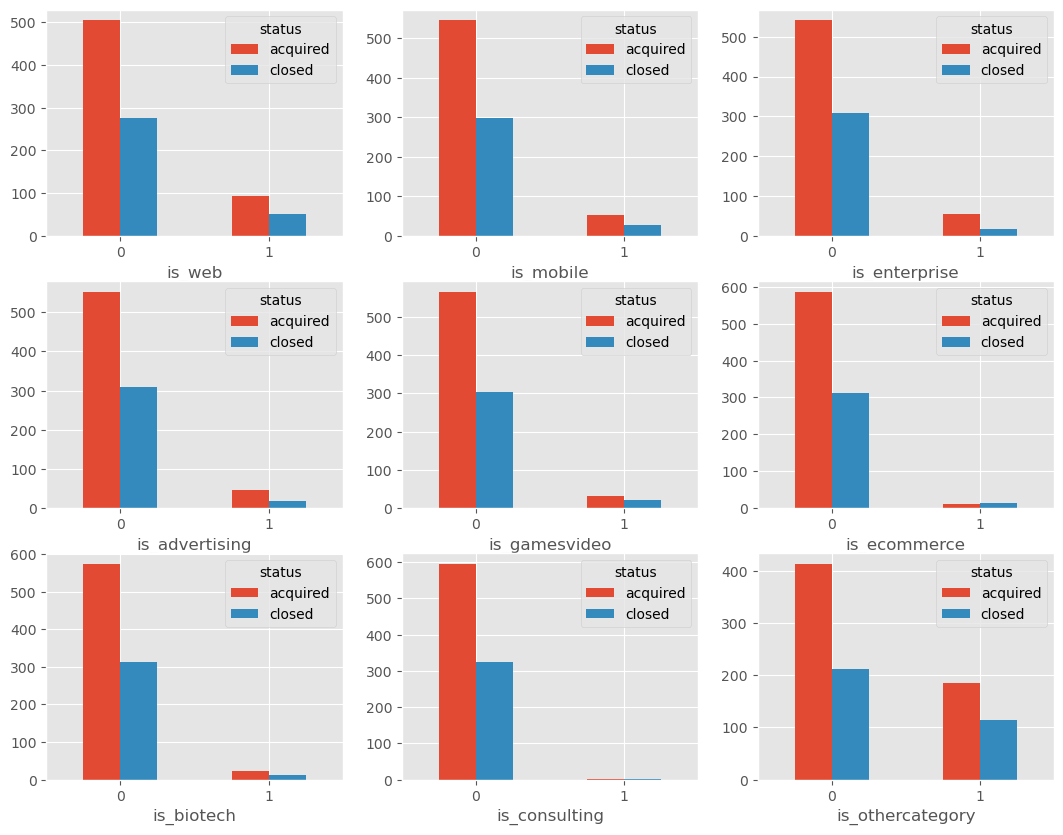

In [114]:
nrow = 3
ncol = 3
fig, axes = plt.subplots(nrows = nrow, ncols = ncol, figsize=(13, 10))
for i in range(len(col_of_int)):
    x_axes = int(i / ncol)
    y_axes = i % ncol
    
    df_tmp = data[['status', 'id', col_of_int[i]]].groupby(['status', col_of_int[i]])['id'].count().reset_index().pivot(
        index = col_of_int[i], 
        columns = 'status', 
        values = 'id')
    df_tmp.plot(kind = 'bar', ax = axes[x_axes, y_axes], rot = 0)
  





Seems like the consluting industry and ecommerce industry do not have much significant difference